In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/California_Houses.csv")

In [ ]:
df.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

In [ ]:
df.isnull().sum()

Median_House_Value          0
Median_Income               0
Median_Age                  0
Tot_Rooms                   0
Tot_Bedrooms                0
Population                  0
Households                  0
Latitude                    0
Longitude                   0
Distance_to_coast           0
Distance_to_LA              0
Distance_to_SanDiego        0
Distance_to_SanJose         0
Distance_to_SanFrancisco    0
dtype: int64

**Data Exploration**

<Axes: >

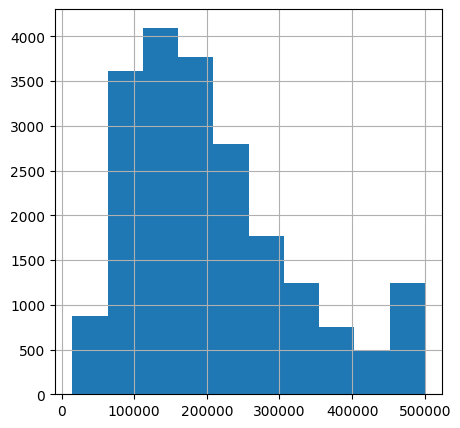

In [ ]:
df['Median_House_Value'].hist(figsize=(5,5))

<Axes: >

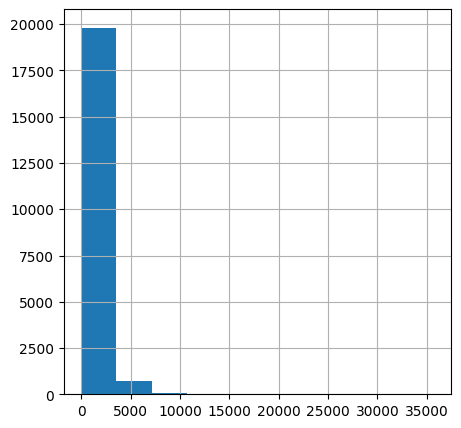

In [ ]:
df['Population'].hist(figsize=(5,5))

<Axes: >

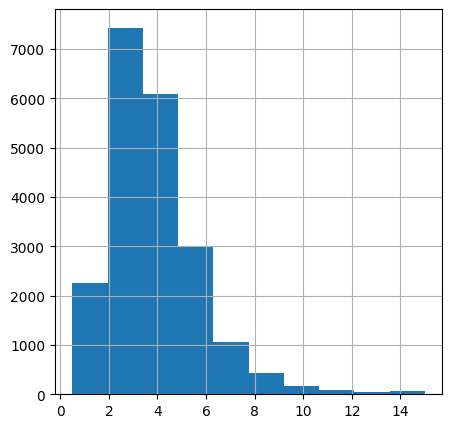

In [ ]:
df['Median_Income'].hist(figsize=(5,5))

<Axes: >

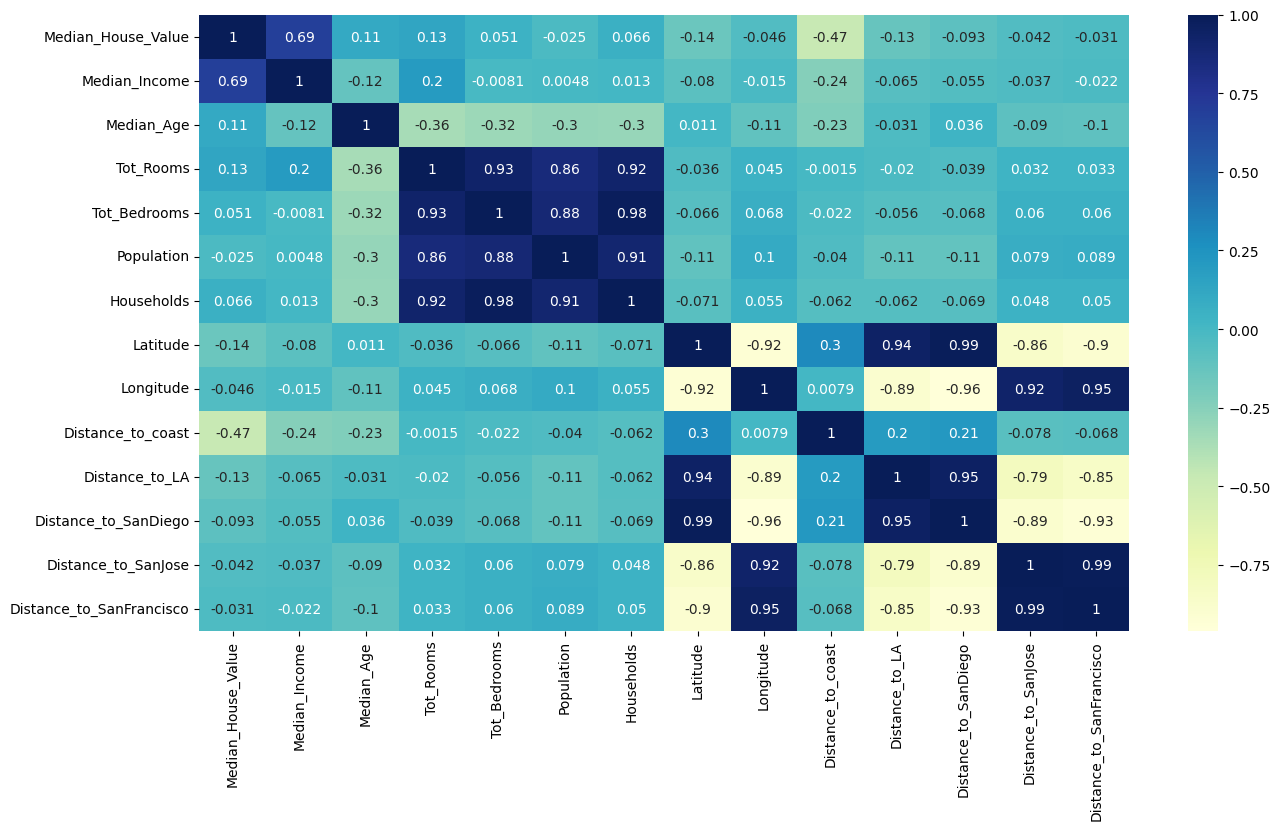

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cmap = "YlGnBu")

<Axes: xlabel='Latitude', ylabel='Longitude'>

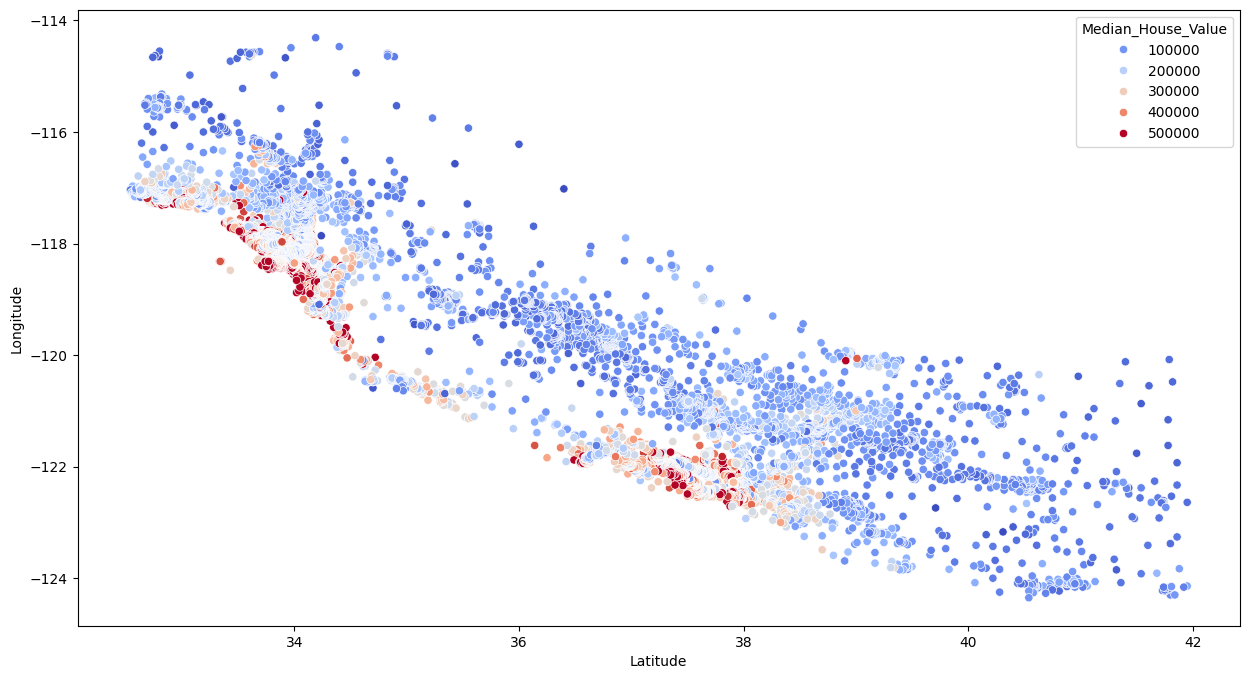

In [ ]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x="Latitude", y = "Longitude", data=df, hue="Median_House_Value", palette='coolwarm')

**Data Transformation**

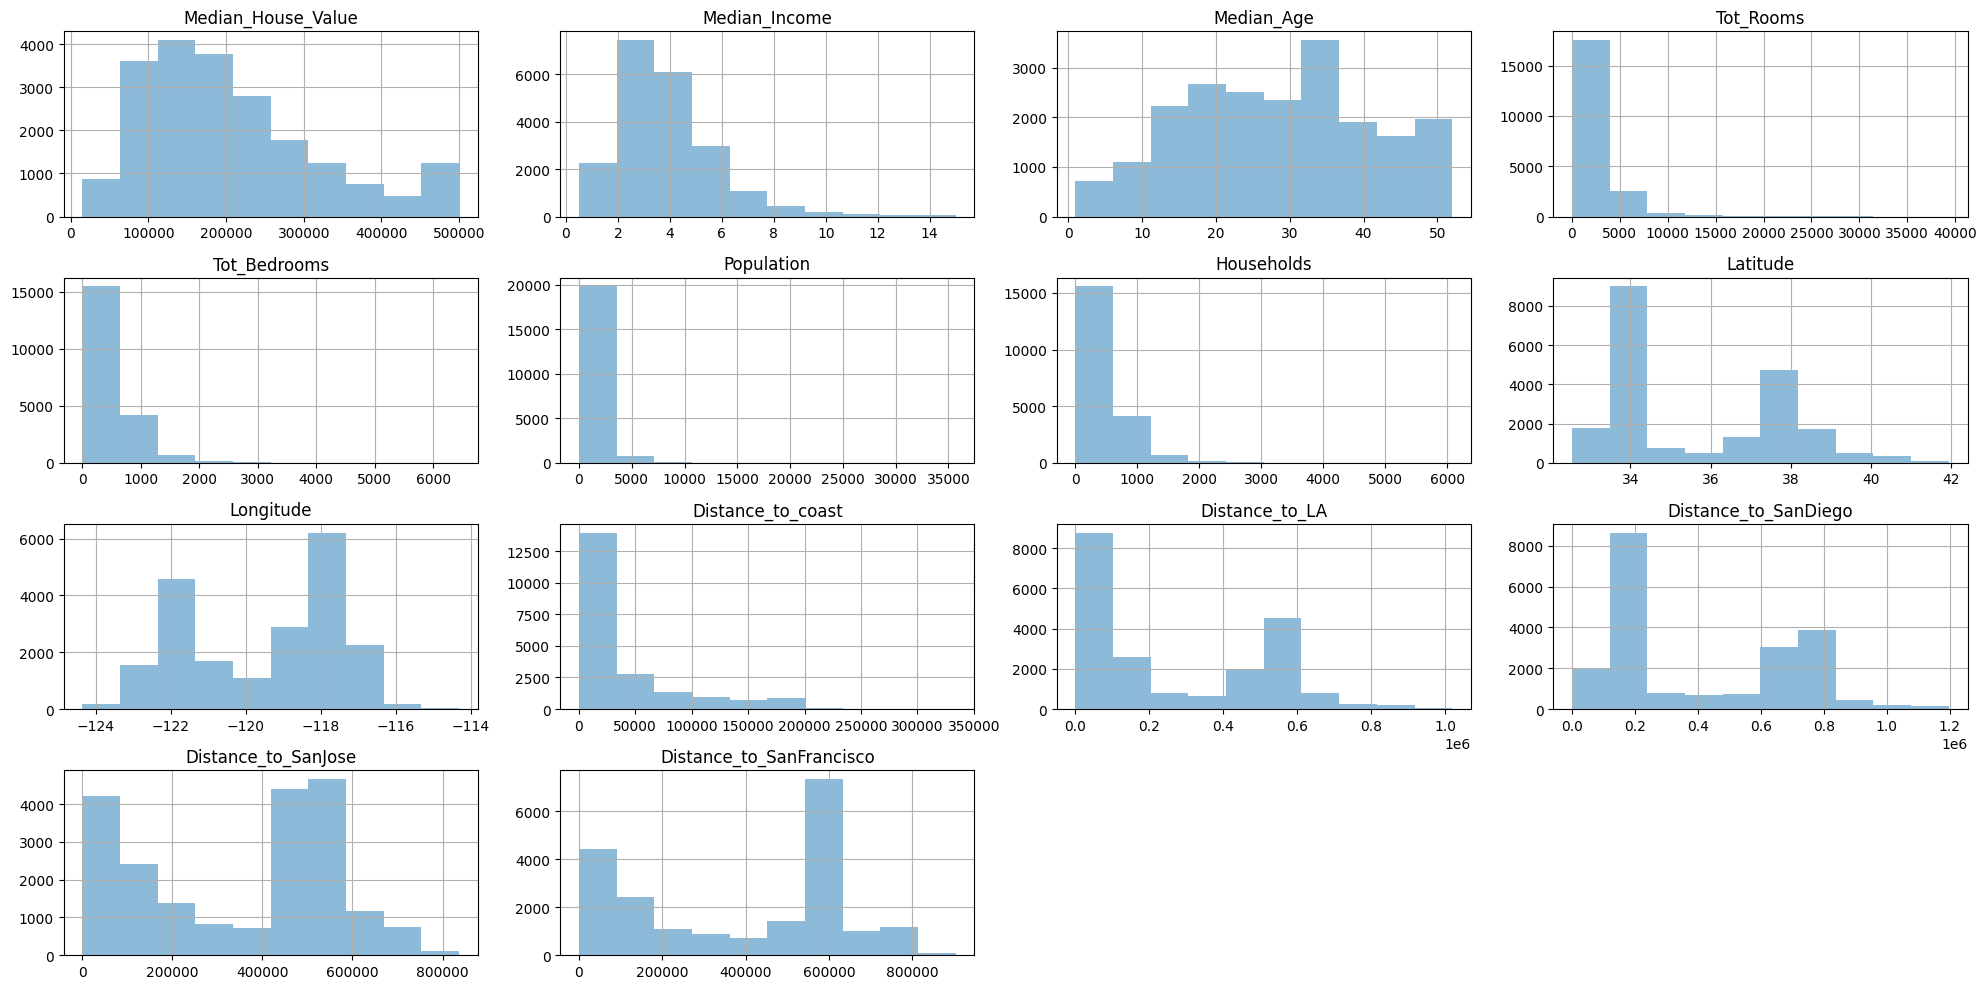

In [ ]:
df.hist(alpha=0.5, figsize=(20, 10))
plt.tight_layout()
plt.show()

In [ ]:
#take algorithm of values and 1 is added to avoided any log(0) value
df['Tot_Rooms'] = np.log(df['Tot_Rooms'] +1)
df['Tot_Bedrooms'] = np.log(df['Tot_Bedrooms'])
df['Population'] = np.log(df['Population'] + 1)
df['Households'] = np.log(df['Households'] + 1)
df['Distance_to_coast'] = np.log(df['Households'] + 1)

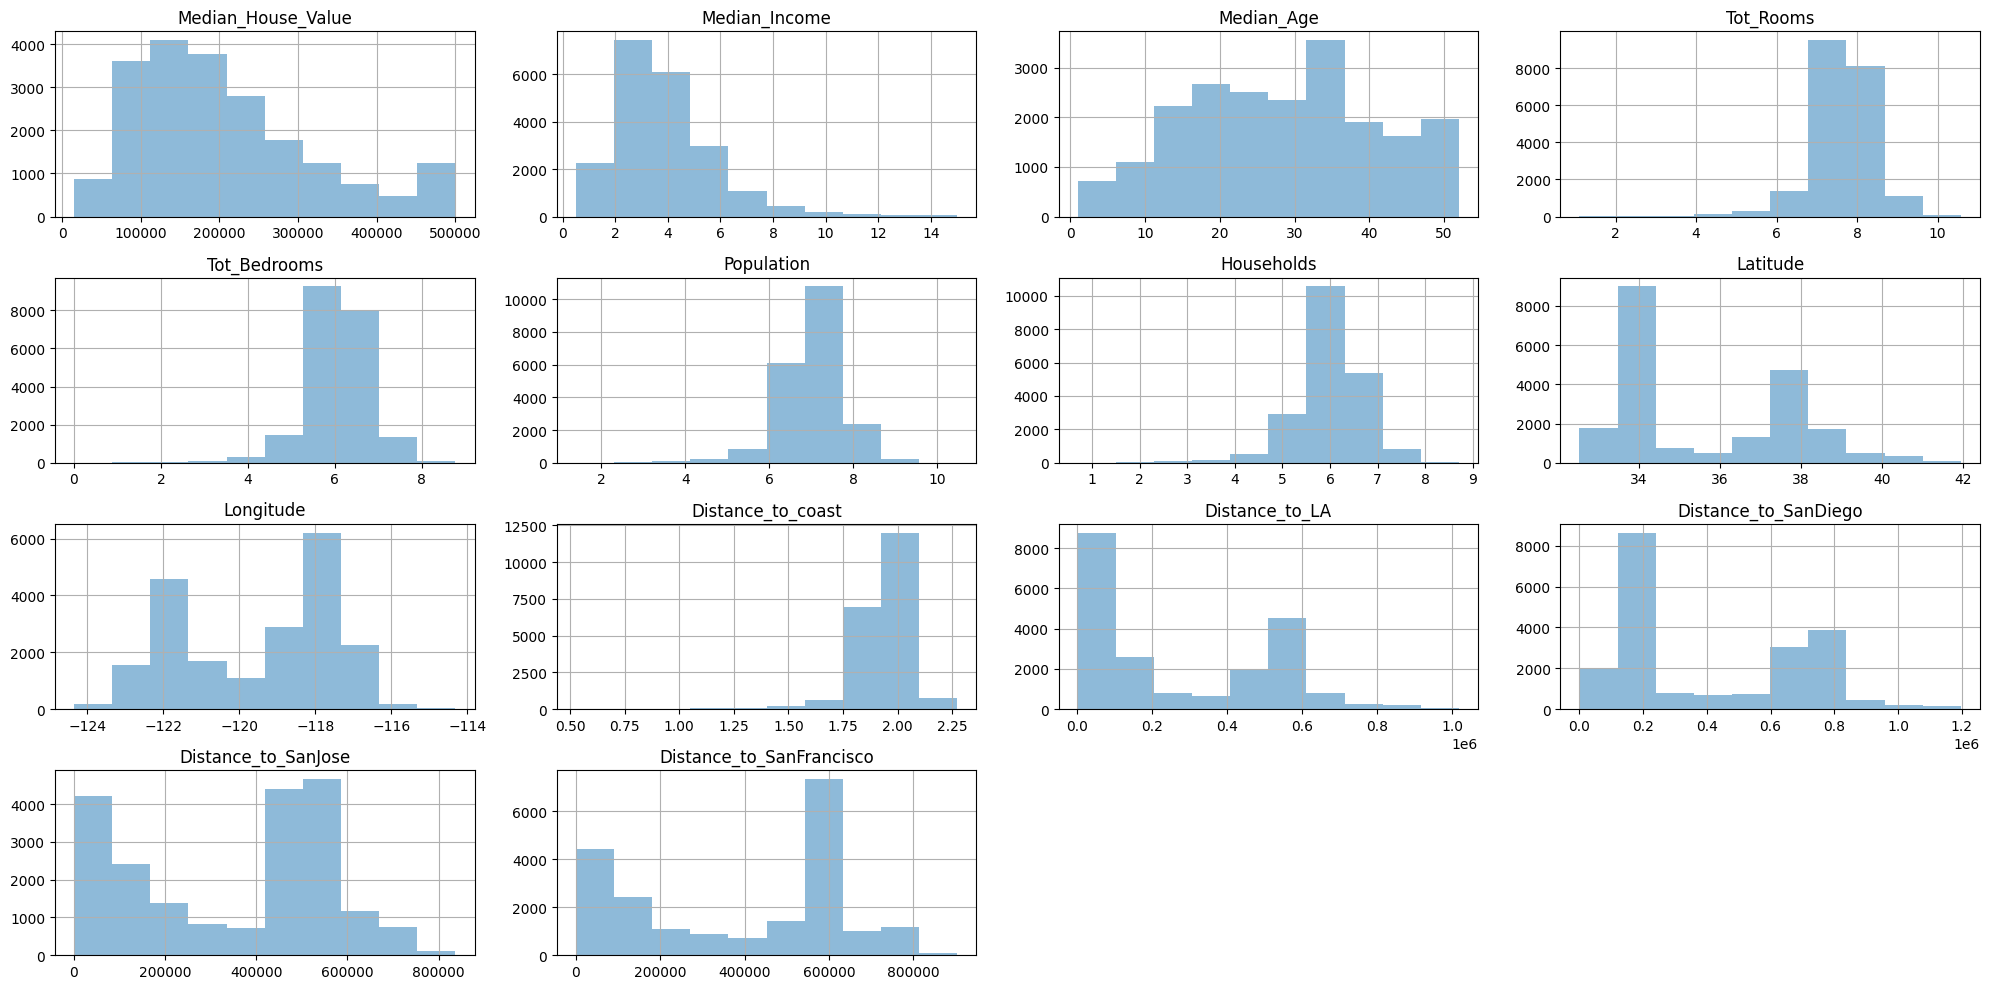

In [ ]:
#Checking for bell curve distributions
df.hist(alpha=0.5, figsize=(20, 10))
plt.tight_layout()
plt.show()

**Multiple Linear Regression Model**

In [ ]:
#Before running the model split the data into train and test split
from sklearn.model_selection import train_test_split
X = df.drop(['Median_House_Value'], axis=1)
y = df['Median_House_Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)
train_data = X_train.join(y_train)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
model = reg.fit(X_train, y_train)
print("Model intercept", model.intercept_)
print("Coefficients", model.coef_)

Model intercept -2138468.713055342
Coefficients [ 4.30801302e+04  9.62949497e+02 -4.69728016e+04  9.80793297e+04
 -9.42023998e+04  8.56272196e+04 -5.65691586e+04 -3.74531699e+04
 -2.39604634e+05 -1.45448204e-01  2.52783366e-01  2.05622108e-01
 -1.70922396e-01]


In [ ]:
import statsmodels.api as sm
X = df.drop(['Median_House_Value'], axis=1)
y = df['Median_House_Value']
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
train_data = X_train.join(y_train)
X_train = sm.add_constant(X_train)
olsmod = sm.OLS(y_train, X_train).fit()
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:     Median_House_Value   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     2610.
Date:                Mon, 01 Apr 2024   Prob (F-statistic):               0.00
Time:                        12:00:59   Log-Likelihood:            -2.0667e+05
No. Observations:               16512   AIC:                         4.134e+05
Df Residuals:                   16498   BIC:                         4.135e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [ ]:
print('R^2 score:', olsmod.rsquared)
print('F-statistic:', olsmod.fvalue)
print('Probability of observing value at least as high as F-statistic:', olsmod.f_pvalue)

R^2 score: 0.6728759783400244
F-statistic: 2610.420879123758
Probability of observing value at least as high as F-statistic: 0.0
